In [2]:
import pandas as pd
df = pd.read_csv('horseRacing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98390 entries, 0 to 98389
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   race_id        98390 non-null  int64  
 1   horse_id       98390 non-null  int64  
 2   1-101          33668 non-null  float64
 3   1-102          33788 non-null  float64
 4   1-103          33749 non-null  float64
 5   1-104          28734 non-null  float64
 6   1-105          28830 non-null  float64
 7   1-106          28830 non-null  float64
 8   1-107          28825 non-null  float64
 9   1-108          76209 non-null  float64
 10  1-109          76371 non-null  float64
 11  1-110          76159 non-null  float64
 12  1-111          75294 non-null  float64
 13  1-112          73641 non-null  float64
 14  1-113          63877 non-null  float64
 15  1-114          75479 non-null  float64
 16  1-115          73844 non-null  float64
 17  1-116          64457 non-null  float64
 18  1-117 

In [3]:
# Count null values in each column
null_counts = df.isnull().sum()
print(null_counts)

race_id              0
horse_id             0
1-101            64722
1-102            64602
1-103            64641
                 ...  
4-115            10352
4-116            11402
4-117             9470
calc_position        4
price                0
Length: 64, dtype: int64


In [4]:
# Count null values in each column
null_counts = df.isnull().sum()
print(null_counts)

race_id              0
horse_id             0
1-101            64722
1-102            64602
1-103            64641
                 ...  
4-115            10352
4-116            11402
4-117             9470
calc_position        4
price                0
Length: 64, dtype: int64


In [5]:
#drop null values from data
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12520 entries, 278 to 98330
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   race_id        12520 non-null  int64  
 1   horse_id       12520 non-null  int64  
 2   1-101          12520 non-null  float64
 3   1-102          12520 non-null  float64
 4   1-103          12520 non-null  float64
 5   1-104          12520 non-null  float64
 6   1-105          12520 non-null  float64
 7   1-106          12520 non-null  float64
 8   1-107          12520 non-null  float64
 9   1-108          12520 non-null  float64
 10  1-109          12520 non-null  float64
 11  1-110          12520 non-null  float64
 12  1-111          12520 non-null  float64
 13  1-112          12520 non-null  float64
 14  1-113          12520 non-null  float64
 15  1-114          12520 non-null  float64
 16  1-115          12520 non-null  float64
 17  1-116          12520 non-null  float64
 18  1-117    

In [6]:
# Define features (X) and target (y)
X = df.drop(["calc_position", "price"], axis=1)  # adjust columns if needed
y = df["calc_position"]

In [10]:
import numpy as np
# Split data
np.random.seed(42)
mask = np.random.rand(len(X)) < 0.8
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]


In [16]:
# Add bias term (column of 1s) to X_train and X_test
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]    

In [18]:
# Train the model using the normal equation
theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

In [19]:
# Predict on test set
y_pred = X_test_b.dot(theta)

In [20]:
#evaluation
#Mean Squared Error
mse = np.mean((y_test - y_pred) ** 2)

# R^2 Score
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)  # Total sum of squares
ss_residual = np.sum((y_test - y_pred) ** 2)        # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)

# Mean Absolute Error 
mae = np.mean(np.abs(y_test - y_pred))

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 23.50
R² Score: 0.07
Mean Absolute Error: 3.85


Matplotlib is building the font cache; this may take a moment.


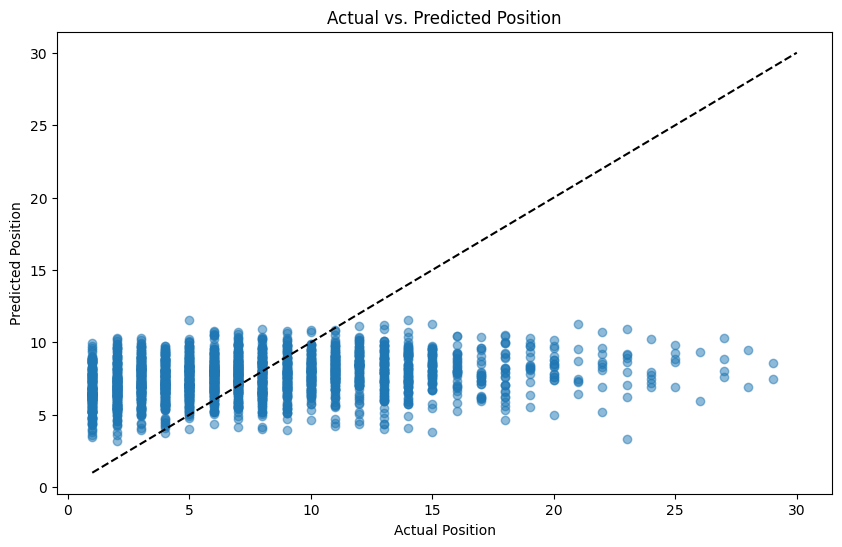

In [21]:
import matplotlib.pyplot as plt
# Plot 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs. Predicted Position")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")  # Diagonal line
plt.show()

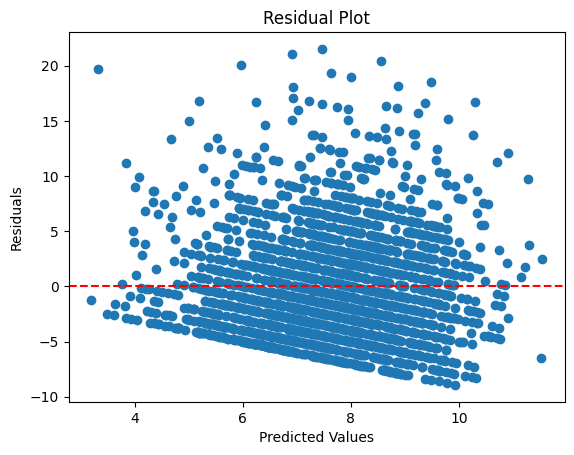

In [22]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color="r", linestyle="--")